# 2019년 11월 28일

- 딥러닝 

레이어가 많아지면 학습이 안되고, 오버 피팅이 될 수 있다. 
학습이 안되면 데이터를 더 늘려야한다. 

은닉층 

활성화함수 


- feature selection
- filter 
- embedded 
- wrapper 

- pytorch 단점: 시스템화하기가 어렵다. 따라서 새 버전이 c++과 연동하기 좋은 쪽으로 발전했다. 

In [1]:
from sklearn.linear_model import Perceptron

In [2]:
Perceptron

sklearn.linear_model.perceptron.Perceptron

텐서플로우 

텐서플로우는 딥러닝을 위해 구글에서 제공하는 프레임워크입니다. 다시 말해, 어느 누구나 사용할수 있는 머신러닝 오픈소스 라이브러리입니다.

Tensor = Multidimensional Arrays = Data (다차원 배열)

텐서 기반으로 artificial 뉴럴 네트워크 계열 프로그래밍 하는 것에 최적화되어 있는 라이브러리



[구현하는 4가지 방식]

keras 3가지

1. 누가 만들어놨던 클래스 그대로 가져오는 방식 (초보자용)

2. 함수형 패러다임 이용하는 방식 

3. 상속해서 남이 만들어 놓은 클래스 가져오는 방식 (전문가용)

tensorflow 2가지 -> 1가지 
- estimator 쓰는 것은 더 이상 사용하지 말라고해서 결국 tensorflow 1가지만 배울 것이다.

1. Tensor 그자체로 처음부터 다 하는 방식 


keras: 원래는 tensorflow 위한 애가 아니었다. 처음에는 티아노라는 애가 있었는데, 쓰기가 어려웠다. 처음에 tensorflow의 쉬운 부분은 keras가 쓰도록 했지만, 이제는 서로 강하게 통합되었다. 
딥러닝 개념만 이해하고 있으면 상호적으로 배우기가 쉽다. 

- unit 개수/ layer가 많을수록 성능은 좋다. 

In [347]:
import tensorflow as tf

In [4]:
tf.__version__
# 쿠다 지원 그래픽 카드 
# 쿠다 버전/ 설치/ mac에서 사용 불가 


'2.0.0'

In [348]:
mnist = tf.keras.datasets.mnist

In [349]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [350]:
# Normalization
x_train, x_test = x_train/255.0, x_test / 255.0

# 0과 1사이에서 찾는게 빠르기 때문에 이걸 하면 더 빠르게 값을 찾을 수 있다. 

## 1번째 방식 

In [352]:
from tensorflow.keras.models import Sequential # 대문자: 클래스 

### model1

In [353]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu', name='1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax', name='2')
], name='one') # 이름을 지정할 수 있다. 

model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# loss는 데이터에 따라 다르게 정한다. 
# gradient decent: optimizer 를 이용하여 global error를 찾도록 도와준다.

compile 3가지 요소 

loss optimzer metrics 

### model2 

In [72]:
model = Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=(28,28) ,name='1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax', name='2')
], name='one') # 이름을 지정할 수 있다. 

model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

### model3

In [35]:
model = Sequential()

In [77]:
# flatten은 코드 편의상 나오는 레이어이다. 
# 남에것 가져올 때 input_layer를 안만드는 대신, input_Shape를 만들어줘야한다. 
# input_shape/input_dimension 이렇게 쓰는방법 2가지
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Dropout도 편의상 레이어 (앞에거 Dense에서 랜덤하게 유닛을 선택하여 0으로 만드는 것)
model.add(tf.keras.layers.Dropout(0.2))
# 맞추기 위해서 하는 것 
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# 여기서는 hidden layer 1개 

활성화함수 
- relu, sigmoid, tans

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
1 (Dense)                    (None, 128)               100480    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
2 (Dense)                    (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
# Dense: fully connected layers

In [44]:
layer1 = Dense(16)
# Dense(units, activation=None, use_bias=True,...
# units 개수는 2의 배수로 쓴다. (보통) - 개발자 입장에서 편해서 갈래상 2의 배수로 쓴다. 

In [ ]:
# biase_initializer
# bias_reguralizer: 오버피팅 되는 것을 방지용

In [73]:
model.summary()

Model: "one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1 (Dense)                    (None, 28, 128)           3712      
_________________________________________________________________
dropout_20 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
2 (Dense)                    (None, 28, 10)            1290      
Total params: 5,002
Trainable params: 5,002
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=5)
# batch_size: 한번에 학습하는 것이 아닌 몇개 나누어 학습을 통해 갱신
# epochs: 전체 데이터를 5번 학습시킨다는 것 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0640 - accuracy: 0.9798
Epoch 2/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0582 - accuracy: 0.9810
Epoch 3/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0535 - accuracy: 0.9826
Epoch 4/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0479 - accuracy: 0.9841
Epoch 5/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0429 - accuracy: 0.9857


In [16]:
model.evaluate(x_test,y_test, verbose=2)

10000/1 - 1s - loss: 0.0407 - accuracy: 0.9762


[0.07903090946055018, 0.9762]

### Model4

- Hidden layers 2개

In [85]:
model = Sequential()

In [90]:
# flatten은 코드 편의상 나오는 레이어이다. 
# 남에것 가져올 때 input_layer를 안만드는 대신, input_Shape를 만들어줘야한다. 
# input_shape/input_dimension 이렇게 쓰는방법 2가지
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Dropout도 편의상 레이어 (앞에거 Dense에서 랜덤하게 유닛을 선택하여 0으로 만드는 것)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# class 맞추기 위해서 하는 것 
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# 여기서는 hidden layer 1개 

In [91]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

정확도보다는 loss를 확인해야한다. 
loss는 낮을수록 좋다. 

In [100]:
model.fit(x_train, y_train, epochs=5, verbose=2)
# batch_size: 한번에 학습하는 것이 아닌 몇개 나누어 학습을 통해 갱신
# epochs: 전체 데이터를 5번 학습시킨다는 것 

Train on 60000 samples
Epoch 1/5
60000/60000 - 8s - loss: 0.1647 - accuracy: 0.9512
Epoch 2/5
60000/60000 - 9s - loss: 0.1600 - accuracy: 0.9531
Epoch 3/5
60000/60000 - 9s - loss: 0.1512 - accuracy: 0.9557
Epoch 4/5
60000/60000 - 9s - loss: 0.1473 - accuracy: 0.9562
Epoch 5/5
60000/60000 - 9s - loss: 0.1389 - accuracy: 0.9583


In [354]:
model.train_on_batch(x_train, y_train)
# 배치크기에 따라 지정  
# loss/ accuracy 
# __iter__ 가 있으므로 for 통해서 배치 크기에 따라 성능 쳌할 수 있다.

[2.4186661, 0.0872]

In [98]:
model.evaluate(x_test,y_test, verbose=2)
# score 
# verbose : 밑에 설명이 달라진다.

10000/1 - 1s - loss: 0.0719 - accuracy: 0.9625


[0.13264513034857808, 0.9625]

In [103]:
Sequential.__bases__ 
# 부모를 알 수 있다. 
# Model을 받아옴 

(tensorflow.python.keras.engine.training.Model,)

In [118]:
from keras.models import Model
# 이 모델은 multi input, multi output이 된다. 
# 더 복잡한 구조를 만들 수 있다. 

In [119]:
issubclass(Sequential, Model)

False

### keras

## 2번째 방식

In [121]:
from keras.layers import Input, Dense

In [127]:
len(x_train.flatten())

47040000

In [133]:
# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(64, activation='relu')(inputs)
output_2 = Dense(64, activation='relu')(output_1)
predictions = Dense(10, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train)  # starts training

ValueError: Error when checking input: expected input_10 to have 4 dimensions, but got array with shape (60000, 28, 28)

## 3번째 방식 

- 상속을 받아서 쓴다. 
- layers는 컴포시전 시킨다. 

학습(fit)시키는 3가지 방식 
- fit 보다 좀 더 고도화 된 것이 trade on batch (batch size에 따라 학습)
- 아예 모든 방식을 내 맘대로 학습할 수도 있다.

- gradient descent 에 각각의 값을 저장하는 것
- gradient tape 

tensor : 상수와 변수 개념이 있다.

상수: x = 1 했는데, 재할당 없이 2로 바꿀 수 없는 게 상수이다. 
x = 3 했는데, 바뀐다. 

tensor는 값을 할당하는 애가 있다. (assign)

In [136]:
x = tf.constant([1,2,3])

In [162]:
x # 명령형 패러다임 방식/ eagerly executing method 

# tensorflow2에서 이 방식으로 바뀌었다. 전에는 C처럼 compile 해줘야만 보였다. 

<tf.Tensor: id=185402, shape=(3,), dtype=int32, numpy=array([3, 2, 4])>

In [142]:
x.numpy()

array([1, 2, 3])

In [144]:
x+x
# tensor 끼리 연산할 때만 gpu 연산을 할 수 있다.

<tf.Tensor: id=185389, shape=(3,), dtype=int32, numpy=array([2, 4, 6])>

numpy는 범용적으로 필요한 모두 다 구비되어잇지만, tensorflow는 tensor 기반으로 nn네트워크 기능이 많지만, 범용적으로 다른 것들은 기능이 없다.

In [146]:
# assign
y = tf.Variable([1,2,3])

In [149]:
y.assign([3,6,6]) 
# 값을 다른 값으로 할당할 수 있다. 
# 상수는 assign을 할 수 없다. 

# 즉, 값 바꿀 수 있는 tensor와 바꿀 수 없는 tensor가 있다는 말 

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 6, 6])>

In [150]:
import numpy as np

In [157]:
np.add([3,4],[5,6])

array([ 8, 10])

In [168]:
np.add.reduce([3,4,5])

12

In [170]:
tf.reduce_sum([1,2,3]) # reduce는 방향잡아서(axis) sum 할 수 있다.
# strides 개념 덕분에 

<tf.Tensor: id=185409, shape=(), dtype=int32, numpy=6>

In [171]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# 연산자 오버로딩(overloading) 또한 지원합니다.
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [186]:
tf.square([2]) + tf.square([3])
# tensor 끼리 더하는 것

<tf.Tensor: id=185439, shape=(1,), dtype=int32, numpy=array([13])>

In [182]:
class Myint(int):
    def __init__(self,t):
        self.t = t 
        
    def __add__(self,other):
        return self.t + other 
#     연산자에 새로운 기능을 추가시키는 것이 overloading 

In [184]:
Myint(3) + Myint(5)

8

In [183]:
Myint(3)+5

8

In [181]:
Myint(3) + Myint(5)

'안'

### Tensor  

- shape
- dtype

In [187]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


# 2019년 11월 29일 

tensor gpu에서 사용할 수 있고 불변성(immutable)을 가진다.(상수) 
constant라는 것을 이용해서 못바꾸게 만든다. 

numpy 는 gpu 가 안된다. mutable 타입이다.

In [1]:
import tensorflow as tf 

In [3]:
x = tf.constant([1,2,3])
# 이 자체를 상수로 놓지만, 파이썬은 언제든 재할당이 된다. 

In [4]:
x = tf.constant([3,4,5])
# 이 것은 재할당이지, 이것 자체를 바꾸는 것은 아니다. 

In [5]:
# mutable은 아이디값은 같은데 값 자체가 바뀌지는 않는다. 

In [6]:
a = [1,2,3]

In [12]:
print(id(a))

a.append(4)

id(a)
# mutable 뮤터블은 값은 바뀌는데 아이디 값은 안바뀐다.

2074693954312


2074693954312

tensor는 assign을 통해서 값을 바꿀 수 있다. 

상수 개념이 있으면 코딩하기가 더 귀찮지만, 디버깅하기가 좋고 값을 일부러 체크할 필요가 없다. 

mutable은 언제 바뀌는지 모르기 때문에 디버깅하기가 힘들다. 

함수형 패러다임은 뮤터블 개념이 없다. 
함수형 패러다임을 지원 : 함수 다 만들어놓고 하나하나 계산 

tensor board : 구조를 잡아놓고 compile 를 시키면 빠르게 계산할 수 있다. 

명령형 패러다임 방식/ eagerly executing method 

tensorflow2에서 이 방식으로 바뀌었다. 전에는 C처럼 compile 해줘야만 보였다. 

- 리스코프 치환의 원칙: 자식에서 부모거를 가져 올 수 있다. 

* 객체 지향 5원칙 
1. 단일 책임 원칙: 모든 클래스는 하나의 책임만 가지며, 클래스는 그 책임을 완전히 캡슐화해야 한다. 
2. 개방-폐쇄 원칙: SW 개체(클래스, 모듈, 함수 등)는 확장에 대해 열려 있어야 하고, 수정에 대해서는 닫혀 있어야 한다. 
3. 리스코프 치환 원칙: 상위 객체를 자료형 하위 객체로 교체(치환)할 수 있어야한다는 원칙 
4. 인터페이스 분리 원칙: 클라이언트가 자신이 이용하지 않는 메서드에 의존하지 않아야한다는 원칙 
5. 의존관계 역전 원칙: SW 모듈들을 분리하는 특정 형식을 지칭한다. (1) 상위 모듈은 하위 모듈에 의존해서는 안된다. 상하위 모듈 모두 추상화에 의존해야한다. (2) 추상화는 세부 사항에 의존해서는 안된다. 

In [14]:
import numpy as np 

In [15]:
x = tf.add(np.array([1,2]), np.array([1,2]))

In [16]:
x

<tf.Tensor: id=5, shape=(2,), dtype=int32, numpy=array([2, 4])>

In [19]:
y = np.add(tf.constant([1,2]), tf.constant([1,2]))
# 서로 호환이 된다. 

In [20]:
y

array([2, 4])

In [ ]:
# 연산자 오버로딩: 연산자의 기능을 바꿔준다. 

In [21]:
import tensorflow as tf

In [22]:
mnist = tf.keras.datasets.mnist

In [23]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [27]:
t = tf.device('CPU:0')

In [28]:
import inspect

In [29]:
print(inspect.getsource(t.__exit__))

  def __exit__(self, *ex_info):
    ctx = self._ctx
    old_device_name, old_device_spec, new_device_spec = self._stack[-1]
    if ctx.device_spec is not new_device_spec:
      raise RuntimeError(
          "Exiting device scope without proper scope nesting")
    del self._stack[-1]
    ctx._set_device(old_device_name, old_device_spec)  # pylint: disable=protected-access



In [ ]:
# keras 기본 데이터 포맷: 넘파이 
# tensorflow 기본 포맷: 텐서

In [ ]:
# tensor는 gpu 사용할 수 있다. 
# gpu에 (read dvice 해서 gpu, cpu) 할당 가능 

# 관리하기 쉽다. 
# 넘파이 포맷으로 만든걸 포맷으로 바꾸면 일정 cost가 발생 

# 텐서플로우 이용하면 처음부터 텐서로 만들어 놓는게 좋다. 

# 데이터를 넘파이가 아닌 텐서로 관리하는게 좋다. 

In [31]:
dir(tf.data.Dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_maybe_initialize_trackable',
 '_name_based_att

In [55]:
# 클래스 메소드 
v = tf.data.Dataset.from_tensor_slices([1,2,3,4])
# 한묶음으로 관리를 한다. 

In [56]:
v
# hold out 하기 좋은 애 (slices)

<TensorSliceDataset shapes: (), types: tf.int32>

In [49]:
t = tf.data.Dataset.from_tensors([1,2,3])

In [50]:
t

<TensorDataset shapes: (3,), types: tf.int32>

In [51]:
set(dir(v)) ^ set(dir(t))

set()

값 만드는 방법 
- 인스턴스
- 팩토리 메소드
- 리터럴

In [58]:
# holdout  하기 위해서 랜덤하게 뽑을 수 있다. 
v.take(1)

<TakeDataset shapes: (), types: tf.int32>

In [66]:
x= v.take(3)

In [67]:
# 객체로 되어있기 때문에 눈에 보이지 않는다. (iterable)인 애를 묶음으로 가져왔다. 
for i in x:
    print(i)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [68]:
# batch 개념도 쓸 수 있다. 
# 따라서 from_tensor_slices는 홀드아웃할 때 좋다. 

In [85]:
a = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

In [86]:
ds_tensors = a.map(tf.square).shuffle(2).batch(2)
# 셔플은 섞고 2개 를 뽑느다. 

In [87]:
ds_tensors

<BatchDataset shapes: (None,), types: tf.int32>

In [88]:
print('ds_tensors 요소:')
for x in ds_tensors:
    print(x)

ds_tensors 요소:
tf.Tensor([4 9], shape=(2,), dtype=int32)
tf.Tensor([ 1 16], shape=(2,), dtype=int32)
tf.Tensor([25 36], shape=(2,), dtype=int32)


In [89]:
a.map(lambda x:x+2)

<MapDataset shapes: (), types: tf.int32>

텐서에서 지우너하는 gpu 기능 쓰려면 텐서로 바꿔주는 기능이 커서 리소스가 많이 든다. 따라서 텐서를 그냥 씀. 
넘파이와 텐서 호환된게 만들어 놓았다. 

In [91]:
dir(a)
# __iter : for문
# __next : generator

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_maybe_initialize_trackable',
 

In [95]:
# 피클링하면 np.save로 저장할 수 있다. 
# 텐서로도 피클링 통해 저장할 수 있다. 

# https://www.tensorflow.org/tutorials/keras/classification

In [94]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
# 전처리 이미지 보는 것 
# 결과값에 대해 그래프를 그리는 것 

print(tf.__version__)

2.0.0


In [262]:
fashion = keras.datasets.fashion_mnist
(train_im, train_labels),(test_im, test_labels) = fashion.load_data()

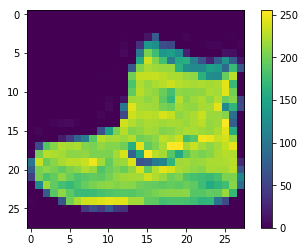

In [263]:
plt.imshow(train_im[0])
plt.colorbar()

In [264]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [265]:
train_im.shape

(60000, 28, 28)

In [266]:
len(train_labels)

60000

In [267]:
# normalization
train_im = train_im/255.0
test_im = test_im/255.0

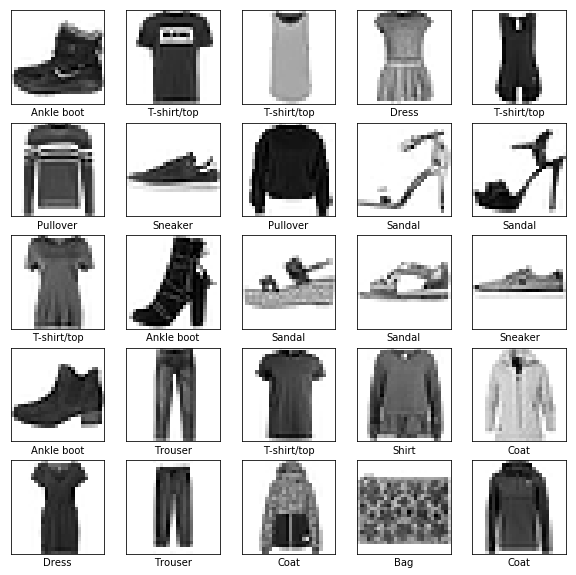

In [268]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_im[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [269]:
model = keras.Sequential()

In [270]:
# 구조만들기
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation = 'relu'))
# classification 개수 맞춰준 것 
model.add(keras.layers.Dense(10, activation = 'softmax'))
# binary = sigmoid 
# multiclass = softmax
# regression = activation function 필요 없다.

In [271]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다. (learning rate,gradient) 

지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [272]:
# compile : loss, optimizer, metrics 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
# categorical_crossentropy (보통)
# sparse_categorical_crossentropy : (one-hot encoding 안된 데이터)

In [273]:
# 모델 훈련 
a = model.fit(train_im, train_labels, epochs=5)

# validation_data -> validation 셋을 지정해줄 수 있다. 
# batch_size: 한번에 학습하는 것이 아닌 몇개 나누어 학습을 통해 갱신
# epochs: 전체 데이터를 5번 학습시킨다는 것 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4991 - accuracy: 0.8236
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3749 - accuracy: 0.8656
Epoch 3/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3370 - accuracy: 0.8778
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3142 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2959 - accuracy: 0.8916


In [151]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [154]:
a.history

# 값 변화한 결과가 히스토리에 저장이 된다. 
# dictionary 형태 
# 그래프 그릴 수 있다.

{'loss': [0.3191453230281671,
  0.3028219168563684,
  0.29111538934310277,
  0.2813006566405296,
  0.27239179743429026],
 'accuracy': [0.88545, 0.8901833, 0.89538336, 0.89825, 0.9009167]}

Text(0, 0.5, 'accuracy')

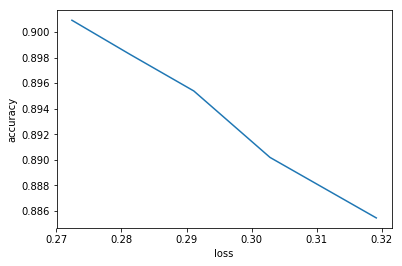

In [173]:
# Dense 128 ROC
plt.plot(a.history['loss'], a.history['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

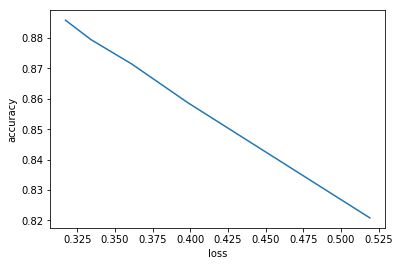

In [186]:
# Dense 64 ROC
plt.plot(a.history['loss'], a.history['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')

In [176]:
model.evaluate(test_im, test_labels, verbose=2)

# metrics =['accuracy'] 를 지우면 결과가 loss 밖에 안나온다.

10000/1 - 1s - loss: 0.2727


0.36607384040355684

In [184]:
# dense: 64
test_loss, test_acc = model.evaluate(test_im, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.3319 - accuracy: 0.8586

테스트 정확도: 0.8586


In [138]:
test_loss, test_acc = model.evaluate(test_im, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.3180 - accuracy: 0.8624

테스트 정확도: 0.8624


In [226]:
model.train_on_batch(train_im, train_labels)
# 배치크기에 따라 지정  
# loss/ accuracy 
# __iter__ 가 있으므로 for 통해서 배치 크기에 따라 성능 쳌할 수 있다.

[0.2740793, 0.8984333]

In [227]:
# model.fit_generator()
# 이미지데이터 제너레이터: 데이터에서 제너레이터에 따라서 핏 시켜주는 것 

In [274]:
predictions = model.predict(test_im)

In [275]:
predictions[0]

array([1.2476424e-06, 2.6267611e-07, 2.6416228e-07, 9.3259587e-08,
       7.9673703e-07, 5.7914983e-03, 8.8731558e-06, 2.2964407e-02,
       2.0012419e-06, 9.7123057e-01], dtype=float32)

In [276]:
np.argmax(predictions[0])

9

In [277]:
test_labels[0]

9

In [278]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color ='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array)
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show(*args, **kw)>

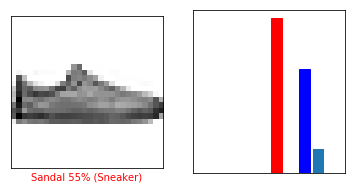

In [279]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels,test_im)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show

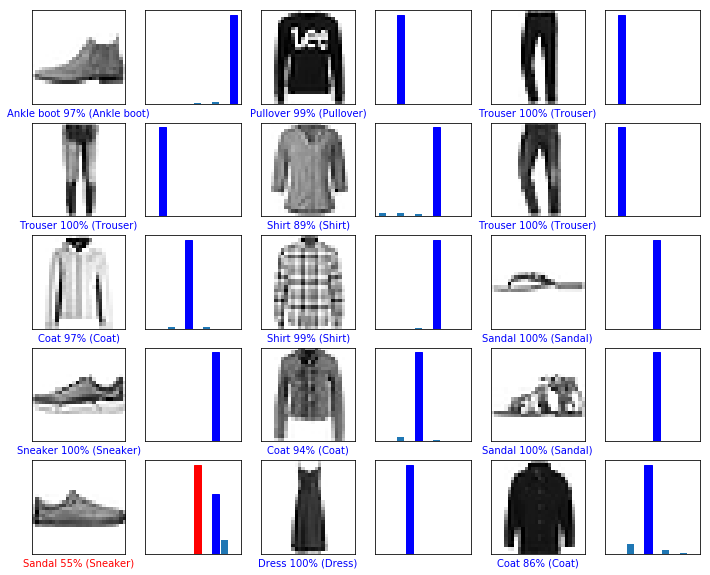

In [280]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_im)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### one-hot encoding

In [201]:
# scikit 

from sklearn.preprocessing import OneHotEncoder

In [203]:
import sklearn
sklearn.__version__ # 20 버전 이상에서만 쓸 수 있다. 

'0.21.3'

In [204]:
ohe = OneHotEncoder()

In [208]:
# reshape 해줘야한다. 
train_labels.reshape(-1,1)

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [211]:
ohe.fit_transform(train_labels.reshape(-1,1)).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
from tensorflow.keras.utils import to_categorical

In [245]:
test_labels = to_categorical(test_labels)

In [246]:
train_labels = to_categorical(train_labels)

In [249]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [251]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
# onehot encoding 할 때는 categorical_crossentropy 를 써야한다. 

In [253]:
a = model.fit(train_im,train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3463 - accuracy: 0.8741
Epoch 2/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3199 - accuracy: 0.8826
Epoch 3/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2993 - accuracy: 0.8895
Epoch 4/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2859 - accuracy: 0.8923
Epoch 5/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2718 - accuracy: 0.8983


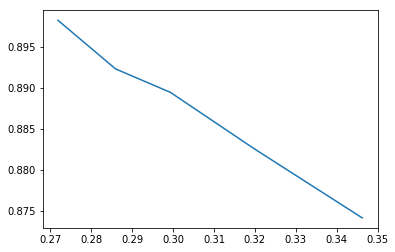

In [254]:
plt.plot(a.history['loss'],a.history['accuracy'])

In [257]:
model.evaluate(test_im, test_labels, verbose=2)

10000/1 - 1s - loss: 0.2681 - accuracy: 0.8764


[0.33844108926057814, 0.8764]

In [258]:
predictions = model.predict(test_im)

In [259]:
np.argmax(predictions[0])

9

In [260]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [283]:
ohe.inverse_transform(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]).reshape(1,-1))

array([[9]], dtype=uint8)

- 원핫 인코딩 
장점: 크기 학습시킬 때 영향이 없다. 

단점: 차원이 10배 확장된다. 성능이 안좋을 수 도 있다. 그리고 차원 확장으로 시간이 더 걸리는 확률이 더 크다.

라벨 데이터를 원핫으로 돌렸다. 라벨일 때는 굳이 원핫 인코딩 안해도된다. 속도에서 큰 차이가 없다. 

<->

숫자값으로 되어있는 인코딩을 라벨 인코딩이라고 한다.
타켓에서는 라벨 인코딩을 원핫 인코딩으로 바꿀 필요가 없다. 

하지만 학습데이터일 경우는 고민해야한다. 
원핫으로 바꾸면 차원이 늘어나서 안좋게 나올 수도 있고, 좋게 나올수도 있다.

자연어처리에서 word2vec에 따라 성능이 달라진다.

케라스 쓸 때는 loss function을 원핫 인코딩에 따라 기법이 다르다. (sparse 있고 없고)

In [284]:
from tensorflow.keras.utils import get_file
# internet 데이터 가져 올 때 get_file를 쓴다. 

### input_shape

Flatten하면 시간이 많이 걸리므로 
아예 flatten을 전처리하고 쓰는게 시간상 더 빠르게 쓸 수 있다.


<정리>
1. output shape 먼저 맞추기 (label 개수) 
2. 라벨은 원핫 인코딩 -> loss fucntion(sparse)
3. input 개수 맞추기 (Flatten)

In [323]:
fashion_mnist = keras.datasets.fashion_mnist

In [332]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_im = train_im.reshape(-1,28*28)

In [333]:
train_im.shape

(60000, 784)

In [342]:
model = keras.Sequential()
# sequential 쓸 때는 무조건 input_shape이 들어가야한다. 
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# shape은 튜플: 1개짜리 튜플은 ,
model.add(keras.layers.Dense(128, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [343]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [344]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [345]:
model.fit(train_im,train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.4967 - accuracy: 0.8254
Epoch 2/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3759 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3378 - accuracy: 0.8771
Epoch 4/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3146 - accuracy: 0.8851
Epoch 5/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2969 - accuracy: 0.8908
